##          ANALYSIS OF AIR POLLUTION LEVELS AND ITS CONTRIBUTING FACTORS

In [ ]:
%matplotlib inline

In [45]:
# Import required libraries
import pandas as pd
import numpy as np

#For visuaization
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
from math import sqrt

#Sci-kit 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
#Setting the figure style and size
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

In [47]:
#loading the data
df = pd.read_csv('PRSA_data.csv')

In [48]:
#Lets look at the data
df.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5
0,1,2010,1,1,0,-21,-11.0,1021.0,NW,1.79,0,0,NaN
1,2,2010,1,1,1,-21,-12.0,1020.0,NW,4.92,0,0,NaN
2,3,2010,1,1,2,-21,-11.0,1019.0,NW,6.71,0,0,NaN
3,4,2010,1,1,3,-21,-14.0,1019.0,NW,9.84,0,0,NaN
4,5,2010,1,1,4,-20,-12.0,1018.0,NW,12.97,0,0,NaN


We can observe null values in the pm2.5 column

In [49]:
#Total number of null values in each column
df["pm2.5"].isnull().sum(axis = 0)

2067

In [50]:
#Total number of rows
df.shape

(43824, 13)

In [51]:
#Lets understand the data types of the columns
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
pm2.5    float64
dtype: object

In [52]:
# We can see the year, month, day and hour can be combined to show the data & Time 
df["datetime"] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [53]:
df.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5,datetime
0,1,2010,1,1,0,-21,-11.0,1021.0,NW,1.79,0,0,NaN,2010-01-01 00:00:00
1,2,2010,1,1,1,-21,-12.0,1020.0,NW,4.92,0,0,NaN,2010-01-01 01:00:00
2,3,2010,1,1,2,-21,-11.0,1019.0,NW,6.71,0,0,NaN,2010-01-01 02:00:00
3,4,2010,1,1,3,-21,-14.0,1019.0,NW,9.84,0,0,NaN,2010-01-01 03:00:00
4,5,2010,1,1,4,-20,-12.0,1018.0,NW,12.97,0,0,NaN,2010-01-01 04:00:00


In [54]:
#Removing unneeded features
df = df.drop(['No','year','day','PRES','Is','Ir'], axis = 1)
df.columns

Index(['month', 'hour', 'DEWP', 'TEMP', 'cbwd', 'Iws', 'pm2.5', 'datetime'], dtype='object')

## Visualizing Features

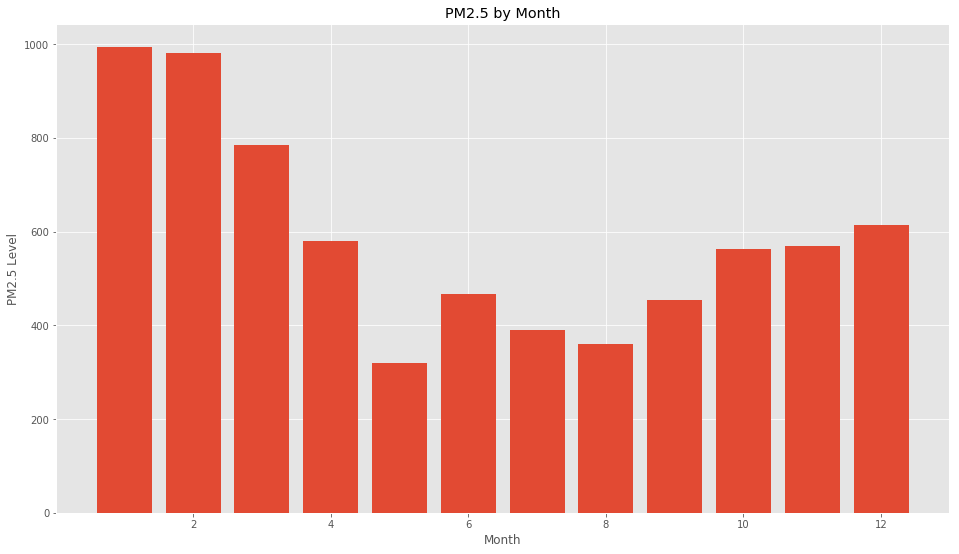

In [12]:
#Let's plot the various features (pm2.5 values,wind speed, etc) to find any relationships.
#Lets start with month
plt.bar(df['month'],df['pm2.5'])
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()

Beijing winter months last from novemeber to mid march. From the above plot we can clearly see that winter months have a much larger variation in pollution levels, including some very high levels during december, january and february

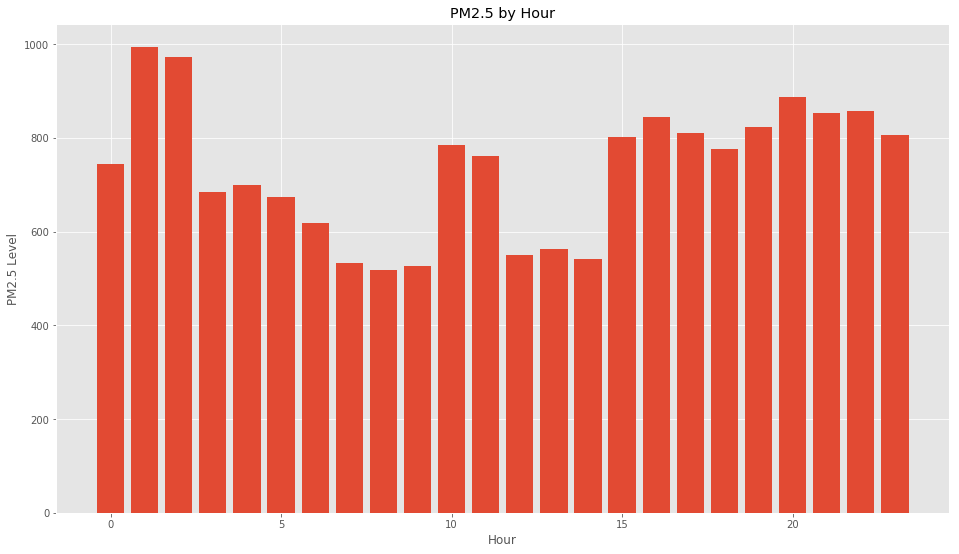

In [13]:
#Studying the hour of the day 
plt.bar(df['hour'],df['pm2.5'])
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

Looking at the plot of hour of the day, It can be observed that there are some spikes during late hours of the day till early morning and a few later in the afternoon.

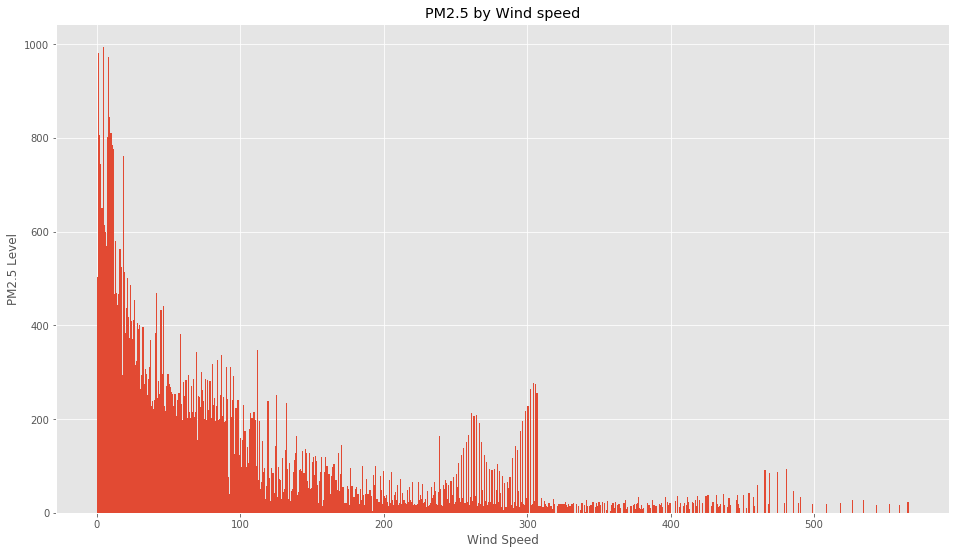

In [14]:
#Studying the relationship between Wind speed and pm2.5
plt.bar(df['Iws'],df['pm2.5'])
plt.xlabel('Wind Speed')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Wind speed')
plt.show()

From this graph it can be sort of understood that higher winds help lower the pm2.5 values. Also from the study of the data in general, I found that wind speed played an important role in lowering the pm2.5 values.This I feel is a strong predictor of the pm2.5 value.

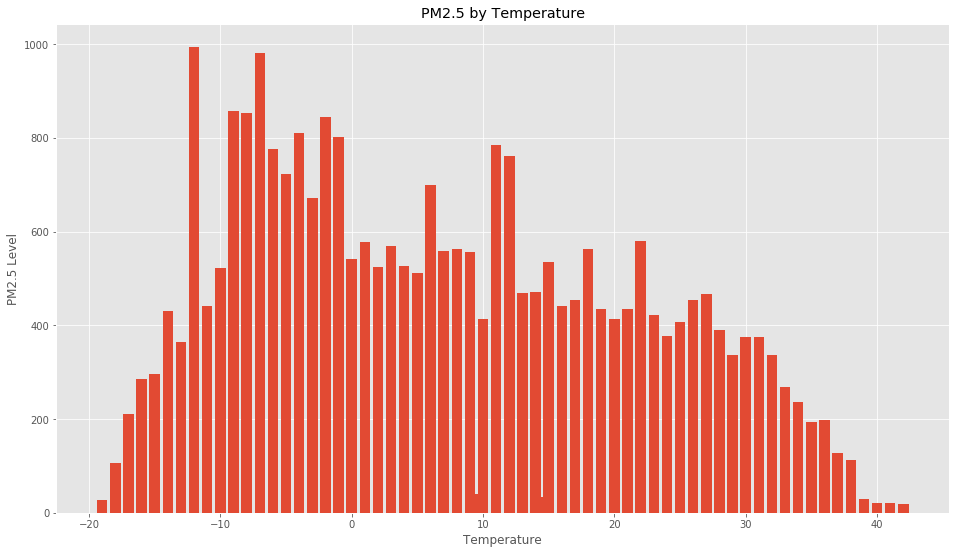

In [15]:
#Studying the relationship between Temperature and pm2.5
plt.bar(df['TEMP'],df['pm2.5'])
plt.xlabel('Temperature')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Temperature')
plt.show()

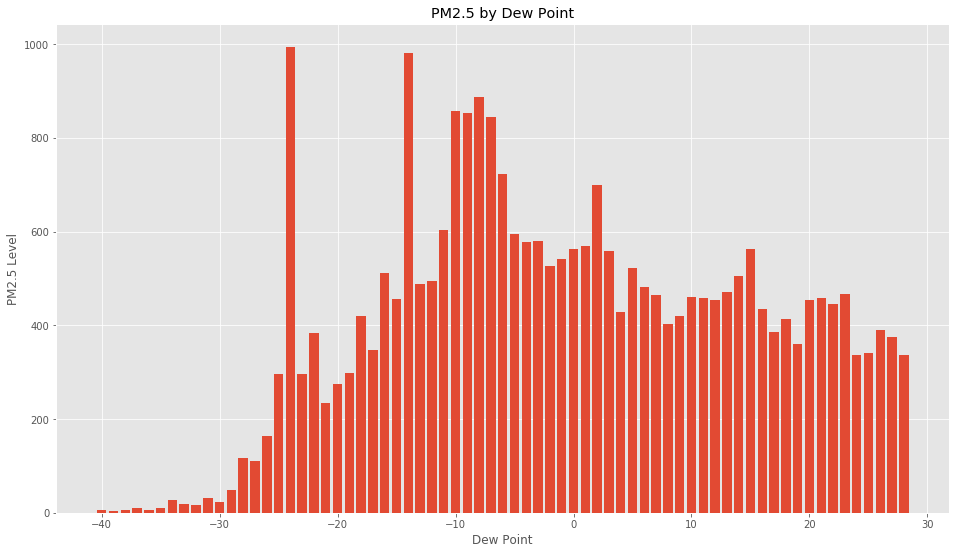

In [16]:
#Studying the relationship between Dew Point and pm2.5
plt.bar(df['DEWP'],df['pm2.5'])
plt.xlabel('Dew Point')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Dew Point')
plt.show()

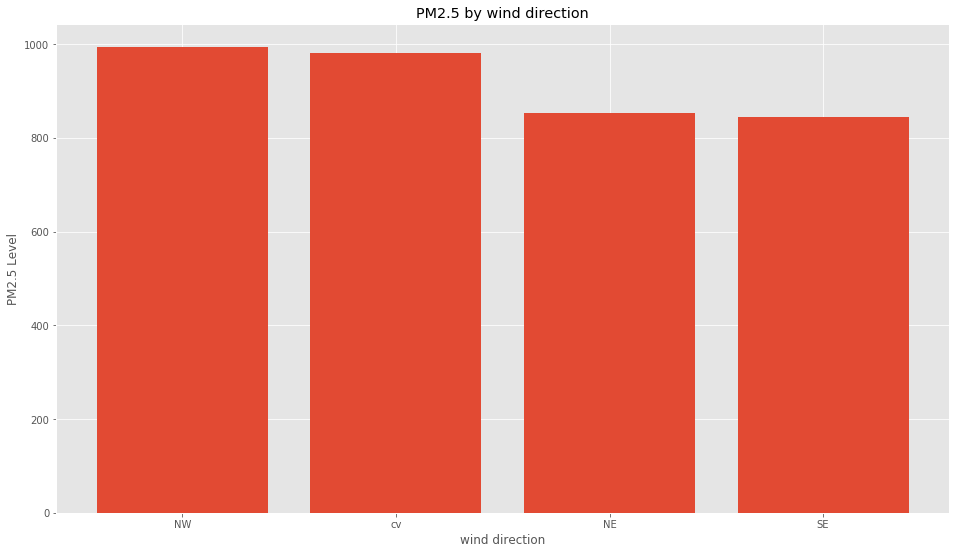

In [18]:
#Studying the relationship between Wind direction and pm2.5
plt.bar(df['cbwd'],df['pm2.5'])
plt.xlabel('wind direction')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by wind direction')
plt.show()

Text(0.5,1,'pm2.5 by Day of the week')

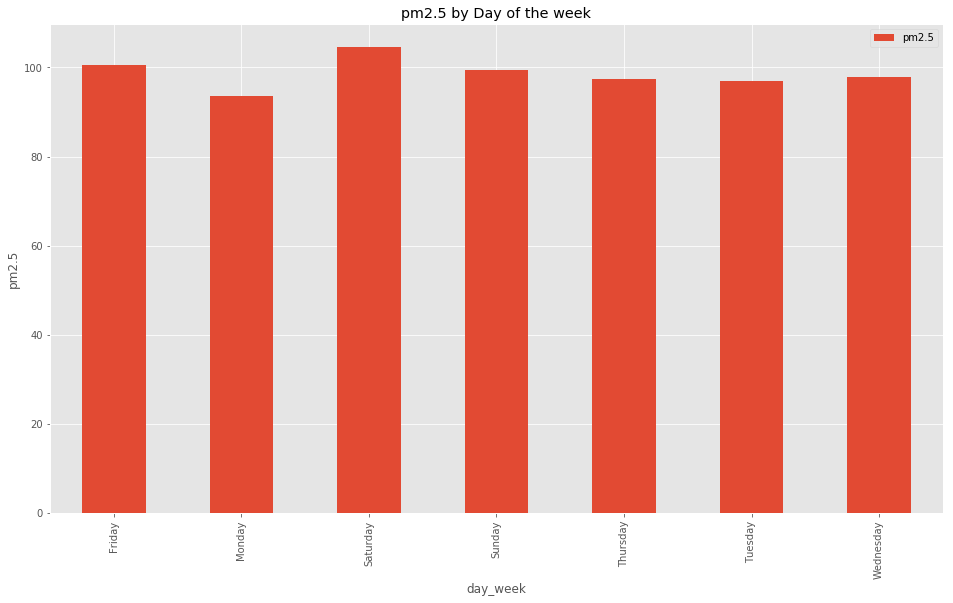

In [27]:
#creating a day of the week field.
df['day_week'] = df['datetime'].dt.weekday_name
df['day_week_cat'] = df.day_week.astype("category").cat.codes
#visualizing the day of the week to understand any relationship with pm2.5 values
view = df[['pm2.5', 'day_week']].groupby(['day_week']).mean()
view.plot(kind='bar')
plt.ylabel("pm2.5")
plt.title("pm2.5 by Day of the week")

The values seem to be on a rise on saturdays(highest), fridays and followed by sundays.

In [55]:
dfwind = df.groupby(['cbwd'])['pm2.5'].mean()
dfwind

cbwd
NE     90.177670
NW     70.127633
SE    110.821588
cv    126.151945
Name: pm2.5, dtype: float64

## Determinations made from visualizations

1. Higher wind speeds cause lowering of the pm2.5 values
2. Winter month seem to have higher pm2.5 values
3. High pm2.5 values can be observed around midnight and through early morning and again towards afternoon.

All three have the possibility of being good predictors.

## Handling Outliers and Missing values

First let us visualise the time-series data and visualy let us spot the outliers.

In [56]:
#time series visualization
def time_series(start, end):
    time_series_df = df[['datetime', 'pm2.5']][(df['datetime'] >= start) & (df['datetime'] <= end)]
    x = time_series_df['datetime']
    y = time_series_df['pm2.5']
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();

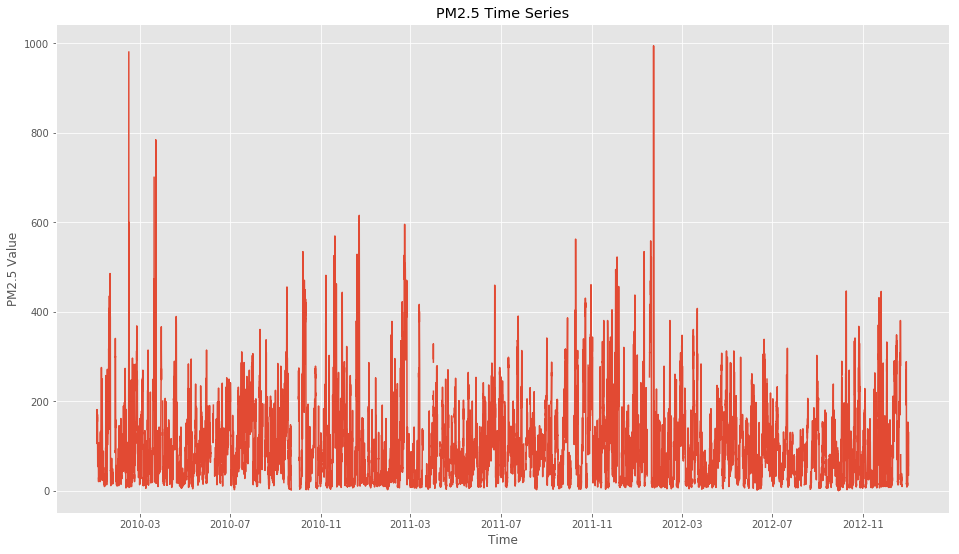

In [57]:
#Visualizing the data for the given years
time_series('2010','2013')

The following graph shows a good example of outliers. These would appear to be errors in the data. In the graph above they appear in roughly the begining and the last 1/4 of the graph.

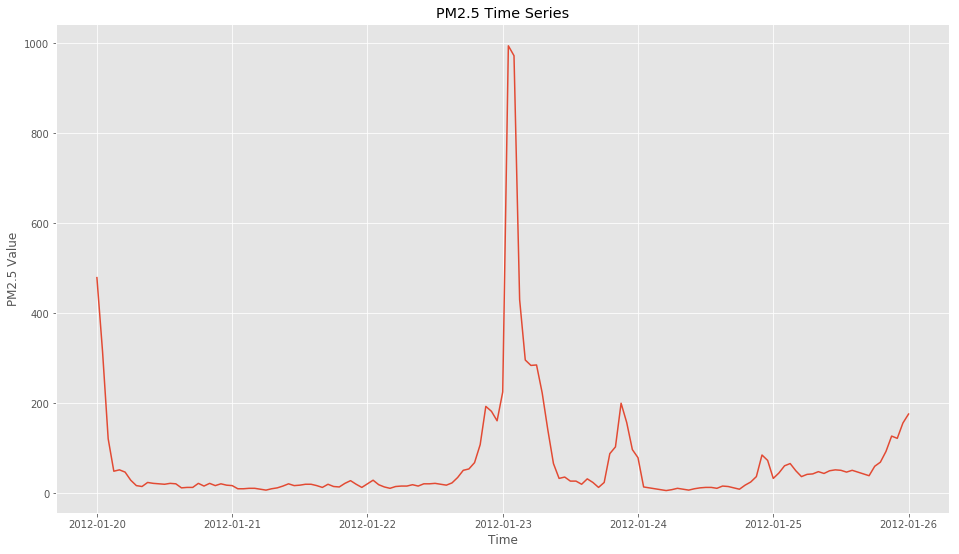

In [58]:
time_series('2012-01-20','2012-01-26')

This graph shows a set of values in the year of 2012, Jan around 23rd having pm2.5 values way high around 900-1000

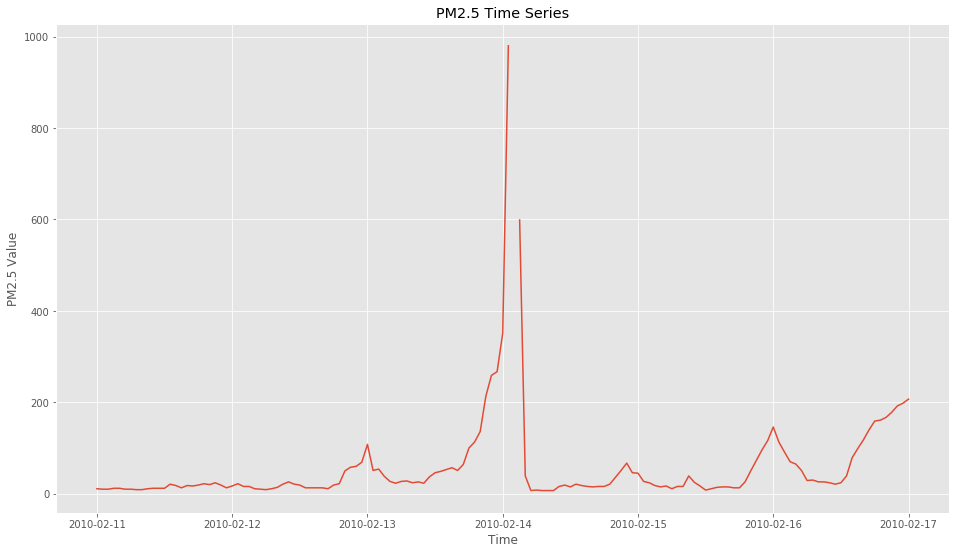

In [59]:
time_series('2010-02-11','2010-02-17')

This graph shows a set of values in the year of 2012, Feb around 14th having pm2.5 values way high around 600-900

These clearly show the outliers in the pm2.5 data 

In [60]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [61]:
df.head()

,datetime,month,hour,DEWP,TEMP,cbwd,Iws,pm2.5
0,2010-01-01 00:00:00,1,0,-21,-11.0,NW,1.79,NaN
1,2010-01-01 01:00:00,1,1,-21,-12.0,NW,4.92,NaN
2,2010-01-01 02:00:00,1,2,-21,-11.0,NW,6.71,NaN
3,2010-01-01 03:00:00,1,3,-21,-14.0,NW,9.84,NaN
4,2010-01-01 04:00:00,1,4,-20,-12.0,NW,12.97,NaN


In [62]:
#Replacing the directions NW,NE,SW,cv by the degree values
#Replacing the direction values with average degree values
#northwest (NW), which includes W, WNW, NW, NNW and N; northeast (NE), for NNE, NE and ENE; 
#southeast (SE), covering E, ESE, SE, SSE and S; southwest (SW), having SSW, SW and WSW; and calm and variable (CV).
df.loc[df['cbwd'] == 'NW','cbwd'] = 285
df.loc[df['cbwd'] == 'SE', 'cbwd'] = 135
df.loc[df['cbwd'] == 'NE', 'cbwd'] = 45
df.loc[df['cbwd'] == 'cv', 'cbwd'] = 0

In [63]:
df.head()

,datetime,month,hour,DEWP,TEMP,cbwd,Iws,pm2.5
0,2010-01-01 00:00:00,1,0,-21,-11.0,285,1.79,NaN
1,2010-01-01 01:00:00,1,1,-21,-12.0,285,4.92,NaN
2,2010-01-01 02:00:00,1,2,-21,-11.0,285,6.71,NaN
3,2010-01-01 03:00:00,1,3,-21,-14.0,285,9.84,NaN
4,2010-01-01 04:00:00,1,4,-20,-12.0,285,12.97,NaN


## Creating previous value features

In my first runs through the model my performance was not ideal. I theorized this is because our current data ignores all previous data. As you can imagine air pollution rises and falls gradually. However in our dataset this information does not exist. As a result I copied and shifted our features to create previous hour features for everything except time going back 5 hours. I found this was the optimal number as extra hours has no noticeable performance increase and fewer hours reduced performance.

In [64]:
df['pm2.5_1'] = df['pm2.5'].shift(periods=1)
df['TEMP_1'] = df.TEMP.shift(periods=1)
df['Iws_1'] = df.Iws.shift(periods=1)
df['DEWP_1'] = df.DEWP.shift(periods=1)
df['cbwd_1'] = df.cbwd.shift(periods=1)
df['pm2.5_2'] = df['pm2.5'].shift(periods=2)
df['TEMP_2'] = df.TEMP.shift(periods=2)
df['Iws_2'] = df.Iws.shift(periods=2)
df['DEWP_2'] = df.DEWP.shift(periods=2)
df['cbwd_2'] = df.cbwd.shift(periods=2)
df['pm2.5_3'] = df['pm2.5'].shift(periods=3)
df['TEMP_3'] = df.TEMP.shift(periods=3)
df['Iws_3'] = df.Iws.shift(periods=3)
df['DEWP_3'] = df.DEWP.shift(periods=3)
df['cbwd_3'] = df.cbwd.shift(periods=3)
# df['pm2.5_4'] = df['pm2.5'].shift(periods=4)
# df['TEMP_4'] = df.TEMP.shift(periods=4)
# df['Iws_4'] = df.Iws.shift(periods=4)
# df['DEWP_4'] = df.DEWP.shift(periods=4)
# df['cbwd_4'] = df.cbwd.shift(periods=4)
# df['pm2.5_5'] = df['pm2.5'].shift(periods=5)
# df['TEMP_5'] = df.TEMP.shift(periods=5)
# df['Iws_5'] = df.Iws.shift(periods=5)
# df['DEWP_5'] = df.DEWP.shift(periods=5)
# df['cbwd_5'] = df.cbwd.shift(periods=5)
# df['pm2.5_6'] = df['pm2.5'].shift(periods=6)
# df['TEMP_6'] = df.TEMP.shift(periods=6)
# df['Iws_6'] = df.Iws.shift(periods=6)
# df['DEWP_6'] = df.DEWP.shift(periods=6)
# df['cbwd_6'] = df.cbwd.shift(periods=6)
# df['pm2.5_7'] = df['pm2.5'].shift(periods=7)
# df['TEMP_7'] = df.TEMP.shift(periods=7)
# df['Iws_7'] = df.Iws.shift(periods=7)
# df['DEWP_7'] = df.DEWP.shift(periods=7)
# df['cbwd_7'] = df.cbwd.shift(periods=7)

In [65]:
df.head(10)

,datetime,month,hour,DEWP,TEMP,cbwd,Iws,pm2.5,pm2.5_1,TEMP_1,...,pm2.5_2,TEMP_2,Iws_2,DEWP_2,cbwd_2,pm2.5_3,TEMP_3,Iws_3,DEWP_3,cbwd_3
0,2010-01-01 00:00:00,1,0,-21,-11.0,285,1.79,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-01 01:00:00,1,1,-21,-12.0,285,4.92,NaN,NaN,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-01 02:00:00,1,2,-21,-11.0,285,6.71,NaN,NaN,-12.0,...,NaN,-11.0,1.79,-21.0,285.0,NaN,NaN,NaN,NaN,NaN
3,2010-01-01 03:00:00,1,3,-21,-14.0,285,9.84,NaN,NaN,-11.0,...,NaN,-12.0,4.92,-21.0,285.0,NaN,-11.0,1.79,-21.0,285.0
4,2010-01-01 04:00:00,1,4,-20,-12.0,285,12.97,NaN,NaN,-14.0,...,NaN,-11.0,6.71,-21.0,285.0,NaN,-12.0,4.92,-21.0,285.0
5,2010-01-01 05:00:00,1,5,-19,-10.0,285,16.10,NaN,NaN,-12.0,...,NaN,-14.0,9.84,-21.0,285.0,NaN,-11.0,6.71,-21.0,285.0
6,2010-01-01 06:00:00,1,6,-19,-9.0,285,19.23,NaN,NaN,-10.0,...,NaN,-12.0,12.97,-20.0,285.0,NaN,-14.0,9.84,-21.0,285.0
7,2010-01-01 07:00:00,1,7,-19,-9.0,285,21.02,NaN,NaN,-9.0,...,NaN,-10.0,16.10,-19.0,285.0,NaN,-12.0,12.97,-20.0,285.0
8,2010-01-01 08:00:00,1,8,-19,-9.0,285,24.15,NaN,NaN,-9.0,...,NaN,-9.0,19.23,-19.0,285.0,NaN,-10.0,16.10,-19.0,285.0
9,2010-01-01 09:00:00,1,9,-20,-8.0,285,27.28,NaN,NaN,-9.0,...,NaN,-9.0,21.02,-19.0,285.0,NaN,-9.0,19.23,-19.0,285.0


## Handling outliers

Let's handle those outlier points in the pm2.5. First lets take a look at the date range from the graph above.

In [66]:
# Select the time frame from the graph above
df[['datetime', 'pm2.5']][(df['datetime'] >= '2012-01-23 00:00:00') & (df['datetime'] <= '2012-01-23 03:00:00')]

,datetime,pm2.5
18048,2012-01-23 00:00:00,225.0
18049,2012-01-23 01:00:00,994.0
18050,2012-01-23 02:00:00,972.0
18051,2012-01-23 03:00:00,430.0


In [67]:
df[['datetime', 'pm2.5']][(df['datetime'] >= '2010-02-14 00:00:00') & (df['datetime'] <= '2010-02-14 05:00:00')]

,datetime,pm2.5
1056,2010-02-14 00:00:00,351.0
1057,2010-02-14 01:00:00,980.0
1058,2010-02-14 02:00:00,NaN
1059,2010-02-14 03:00:00,599.0
1060,2010-02-14 04:00:00,39.0
1061,2010-02-14 05:00:00,7.0


From the above graph, lets remove values that are shown as outliers

In [68]:
#removing pm2.5 values greater than 500
print("Shape before: ", df.shape)
df = df[df['pm2.5'] <= 900]
print("Shape after: ", df.shape)

Shape before:  (43824, 23)
Shape after:  (41754, 23)


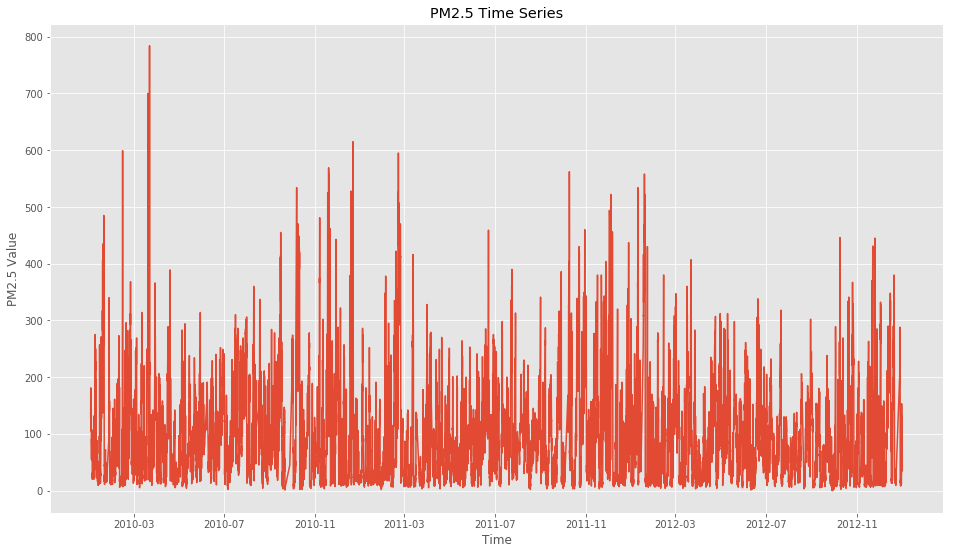

In [69]:
time_series('2010','2013')


I chose to remove any record with a PM2.5 value above 600 μg/m³. After doing my bit of study I learned that measured values above 500 μg/m³ may not be reliable. As the AQI scale only goes to 500 values, above this are simply considered extremely hazardous. 

In [70]:
#Above 500, all seem to be outliers.
#removing pm2.5 values greater than 500
print("Shape before: ", df.shape)
df = df[df['pm2.5'] <= 500]
print("Shape after: ", df.shape)

Shape before:  (41754, 23)
Shape after:  (41632, 23)


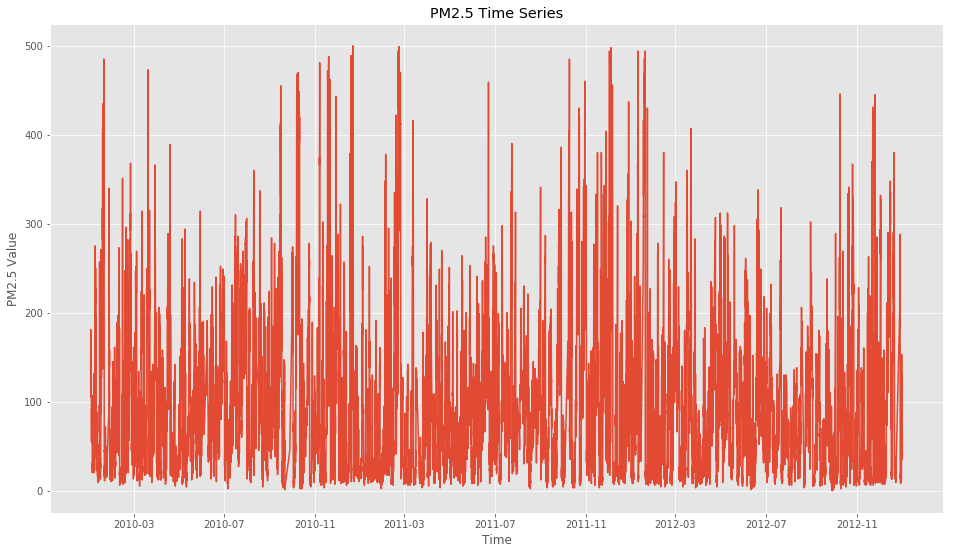

In [71]:
#Now lets visualize the time-series graph with clean data.
time_series('2010','2013')

In [72]:
#checking if there are null values
df.isnull().any()

datetime    False
month       False
hour        False
DEWP        False
TEMP        False
cbwd        False
Iws         False
pm2.5       False
pm2.5_1      True
TEMP_1      False
Iws_1       False
DEWP_1      False
cbwd_1      False
pm2.5_2      True
TEMP_2      False
Iws_2       False
DEWP_2      False
cbwd_2      False
pm2.5_3      True
TEMP_3      False
Iws_3       False
DEWP_3      False
cbwd_3      False
dtype: bool

There are a few records of pm2.5 with missing data. I attempted to fill these values with the mean of records, the median of the records, the previous value, and the next value. In the end I chose to simply remove records with missing values. 

In [73]:
#drop the null values
df = df.dropna()

In [74]:
df.isnull().any()

datetime    False
month       False
hour        False
DEWP        False
TEMP        False
cbwd        False
Iws         False
pm2.5       False
pm2.5_1     False
TEMP_1      False
Iws_1       False
DEWP_1      False
cbwd_1      False
pm2.5_2     False
TEMP_2      False
Iws_2       False
DEWP_2      False
cbwd_2      False
pm2.5_3     False
TEMP_3      False
Iws_3       False
DEWP_3      False
cbwd_3      False
dtype: bool

In [75]:
df.dtypes

datetime    datetime64[ns]
month                int64
hour                 int64
DEWP                 int64
TEMP               float64
cbwd                 int64
Iws                float64
pm2.5              float64
pm2.5_1            float64
TEMP_1             float64
Iws_1              float64
DEWP_1             float64
cbwd_1             float64
pm2.5_2            float64
TEMP_2             float64
Iws_2              float64
DEWP_2             float64
cbwd_2             float64
pm2.5_3            float64
TEMP_3             float64
Iws_3              float64
DEWP_3             float64
cbwd_3             float64
dtype: object

## Visualizing the cleaned features

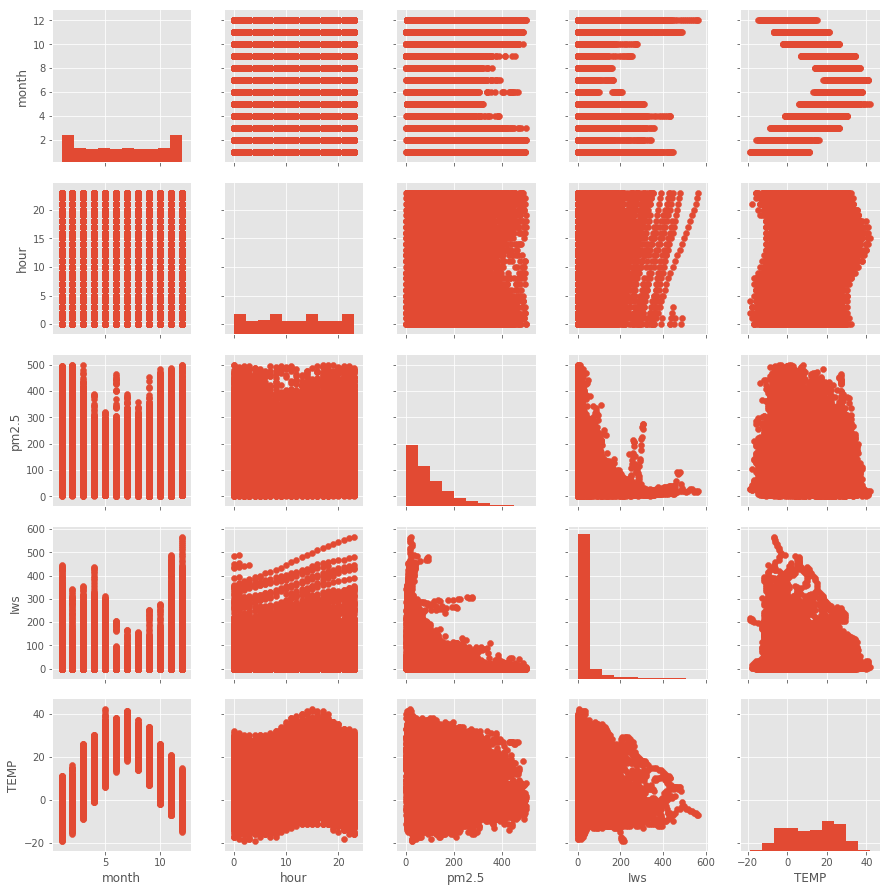

In [122]:
#correlation plot between the different features
g = sns.PairGrid(df, vars=["month", "hour", "pm2.5", "Iws", "TEMP"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

C:\Users\Pujeethaa Jakka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pujeethaa Jakka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pujeethaa Jakka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pujeethaa Jakka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pujeethaa Jakka\Ana

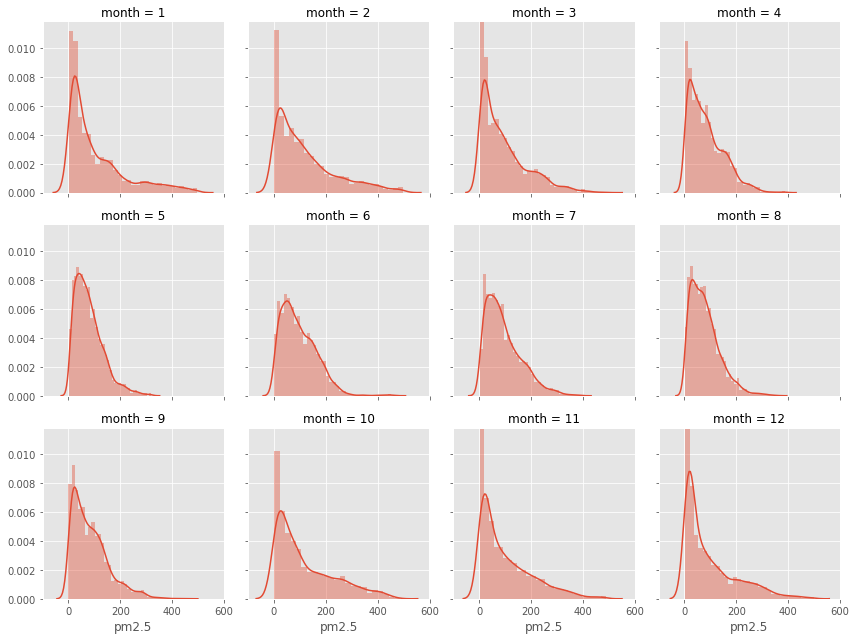

In [46]:
#pm2.5 for every month
g = sns.FacetGrid(df, col='month', col_wrap=4)
g.map(sns.distplot, "pm2.5")
plt.show()

C:\Users\Pujeethaa Jakka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pujeethaa Jakka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pujeethaa Jakka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pujeethaa Jakka\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pujeethaa Jakka\Ana

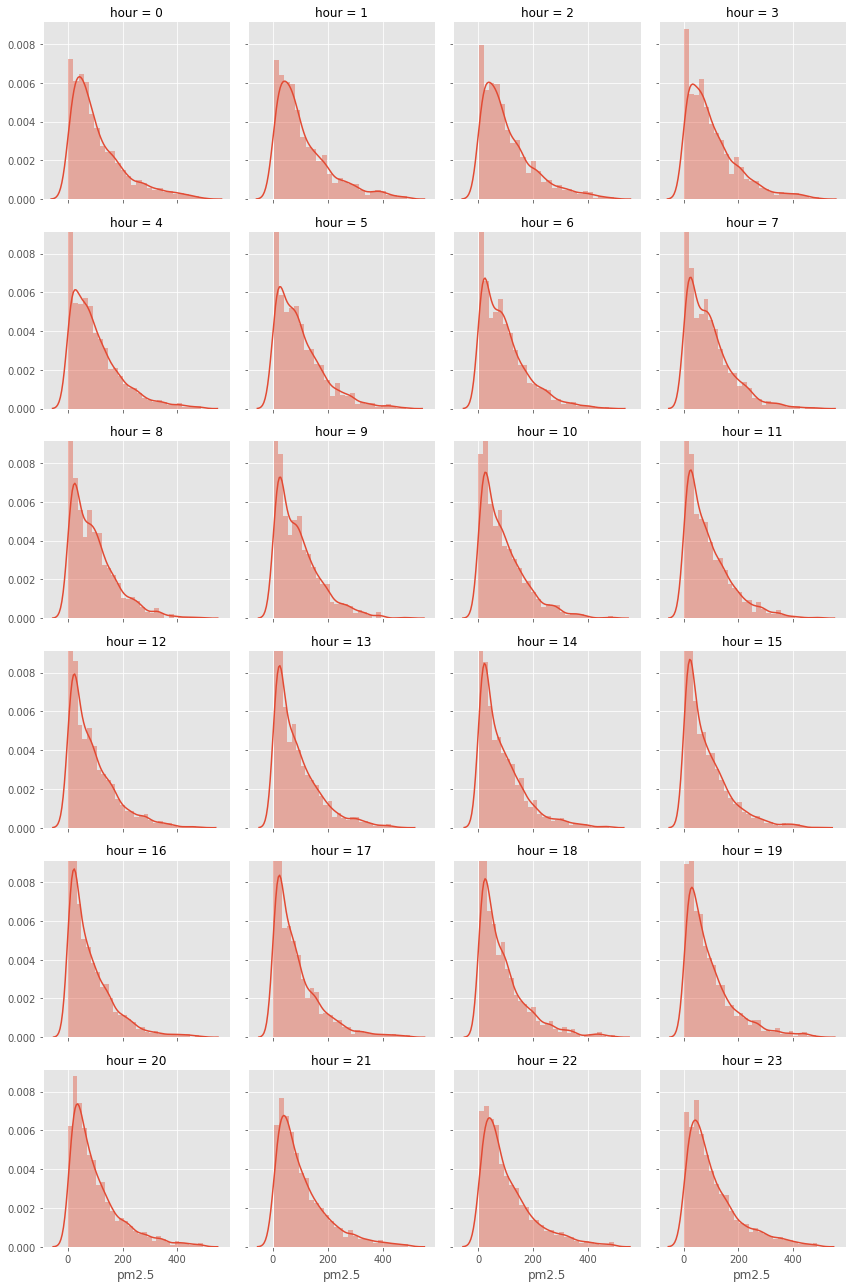

In [47]:
#pm2.5 for every hour of the day
g = sns.FacetGrid(df, col='hour', col_wrap=4)
g.map(sns.distplot, "pm2.5")
plt.show()

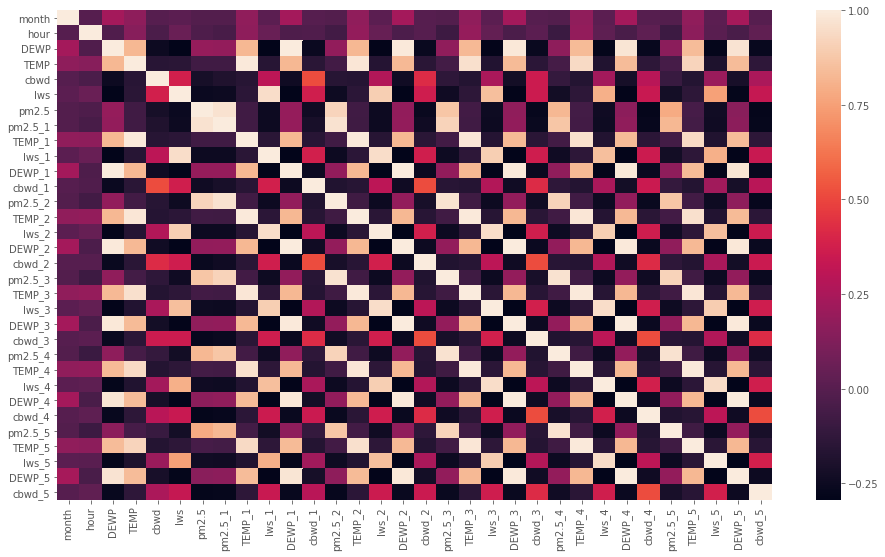

In [48]:
#correlation matrix of all the features
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Feature Engineering

In [76]:
df.head()

,datetime,month,hour,DEWP,TEMP,cbwd,Iws,pm2.5,pm2.5_1,TEMP_1,...,pm2.5_2,TEMP_2,Iws_2,DEWP_2,cbwd_2,pm2.5_3,TEMP_3,Iws_3,DEWP_3,cbwd_3
27,2010-01-02 03:00:00,1,3,-7,-5.0,135,5.36,181.0,159.0,-5.0,...,148.0,-4.0,2.68,-15.0,135.0,129.0,-4.0,1.79,-16.0,135.0
28,2010-01-02 04:00:00,1,4,-7,-5.0,135,6.25,138.0,181.0,-5.0,...,159.0,-5.0,3.57,-11.0,135.0,148.0,-4.0,2.68,-15.0,135.0
29,2010-01-02 05:00:00,1,5,-7,-6.0,135,7.14,109.0,138.0,-5.0,...,181.0,-5.0,5.36,-7.0,135.0,159.0,-5.0,3.57,-11.0,135.0
30,2010-01-02 06:00:00,1,6,-7,-6.0,135,8.93,105.0,109.0,-6.0,...,138.0,-5.0,6.25,-7.0,135.0,181.0,-5.0,5.36,-7.0,135.0
31,2010-01-02 07:00:00,1,7,-7,-5.0,135,10.72,124.0,105.0,-6.0,...,109.0,-6.0,7.14,-7.0,135.0,138.0,-5.0,6.25,-7.0,135.0


Convert windspeed from m/s to kph

In [77]:
# 1 mps = 3.6 kph
df['Iws'] = df.Iws * 3.6
df['Iws_1'] = df.Iws_1 * 3.6
df['Iws_2'] = df.Iws_2 * 3.6
df['Iws_3'] = df.Iws_3 * 3.6
# df['Iws_4'] = df.Iws_4 * 3.6
# df['Iws_5'] = df.Iws_5 * 3.6
# df['Iws_6'] = df.Iws_6 * 3.6
# df['Iws_7'] = df.Iws_7 * 3.6

In [78]:
df.head()

,datetime,month,hour,DEWP,TEMP,cbwd,Iws,pm2.5,pm2.5_1,TEMP_1,...,pm2.5_2,TEMP_2,Iws_2,DEWP_2,cbwd_2,pm2.5_3,TEMP_3,Iws_3,DEWP_3,cbwd_3
27,2010-01-02 03:00:00,1,3,-7,-5.0,135,19.296,181.0,159.0,-5.0,...,148.0,-4.0,9.648,-15.0,135.0,129.0,-4.0,6.444,-16.0,135.0
28,2010-01-02 04:00:00,1,4,-7,-5.0,135,22.500,138.0,181.0,-5.0,...,159.0,-5.0,12.852,-11.0,135.0,148.0,-4.0,9.648,-15.0,135.0
29,2010-01-02 05:00:00,1,5,-7,-6.0,135,25.704,109.0,138.0,-5.0,...,181.0,-5.0,19.296,-7.0,135.0,159.0,-5.0,12.852,-11.0,135.0
30,2010-01-02 06:00:00,1,6,-7,-6.0,135,32.148,105.0,109.0,-6.0,...,138.0,-5.0,22.500,-7.0,135.0,181.0,-5.0,19.296,-7.0,135.0
31,2010-01-02 07:00:00,1,7,-7,-5.0,135,38.592,124.0,105.0,-6.0,...,109.0,-6.0,25.704,-7.0,135.0,138.0,-5.0,22.500,-7.0,135.0


In [88]:
#Dropping off columns not necessary to fit a model 
df = df.drop(labels='day_week', axis=1)
df = df.drop(['datetime'], axis=1)
df.columns

Index(['month', 'hour', 'DEWP', 'TEMP', 'cbwd', 'Iws', 'pm2.5', 'pm2.5_1',
       'TEMP_1', 'Iws_1', 'DEWP_1', 'cbwd_1', 'pm2.5_2', 'TEMP_2', 'Iws_2',
       'DEWP_2', 'cbwd_2', 'pm2.5_3', 'TEMP_3', 'Iws_3', 'DEWP_3', 'cbwd_3'],
      dtype='object')

## Split into Training and Test Data

We will split our data into training and test data using Scikit learn's built in libraries. We will also separate our dataset into inputs and feature matrices being predicted (or X's and y's).

In [89]:
#Traget / dependant variable
y = df['pm2.5']

In [90]:
# creating a matrix of independant variables
X = df.drop(['pm2.5'], axis=1)

In [91]:
#Splitting the data into training and test data - training - 70% and test - 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [92]:
X_train.shape, y_train.shape

((28723, 21), (28723,))

In [93]:
X_test.shape, y_test.shape

((12311, 21), (12311,))

In [94]:
X.columns

Index(['month', 'hour', 'DEWP', 'TEMP', 'cbwd', 'Iws', 'pm2.5_1', 'TEMP_1',
       'Iws_1', 'DEWP_1', 'cbwd_1', 'pm2.5_2', 'TEMP_2', 'Iws_2', 'DEWP_2',
       'cbwd_2', 'pm2.5_3', 'TEMP_3', 'Iws_3', 'DEWP_3', 'cbwd_3'],
      dtype='object')

## Implementing the Machine Learning  Algorithms

classification is about predicting a label and regression is about predicting a quantity. In this case we are trying to predict the pm2.5 value and hence i felt regression to be the best bet. 

I am using the followuing algorithms to fit and predict
1. Linear Regression
2. Losso Regression
3. Elastic Net Regression
4. Decision Forest
5. Ridge Regression
6. Neural Network
7. XgBoost
8. Extra Trees
9. Decision Tree
10. Boosted Decision Tree

## LINEAR REGRESSION

In [95]:
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
lin_pred = regr.predict(X_test)
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.9434184588566525

In [96]:
# Statistics !
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Coefficients: 
 [-2.21137435e-02  2.15251353e-01  1.80471884e+00 -4.20820662e-01
 -1.13993452e-02  3.68825835e-03  1.11009180e+00  2.80036584e-01
  3.20558371e-03 -4.96408127e-03 -1.59828176e-02 -2.28137851e-01
 -3.67039816e-01 -4.11621700e-03 -1.24451696e+00 -5.18564740e-03
  5.76739238e-02  2.55009151e-01 -9.84571886e-04 -3.76641436e-01
 -5.30843870e-03]
Root mean squared error: 20.79
Mean absolute error: 12.39
R-squared: 0.94


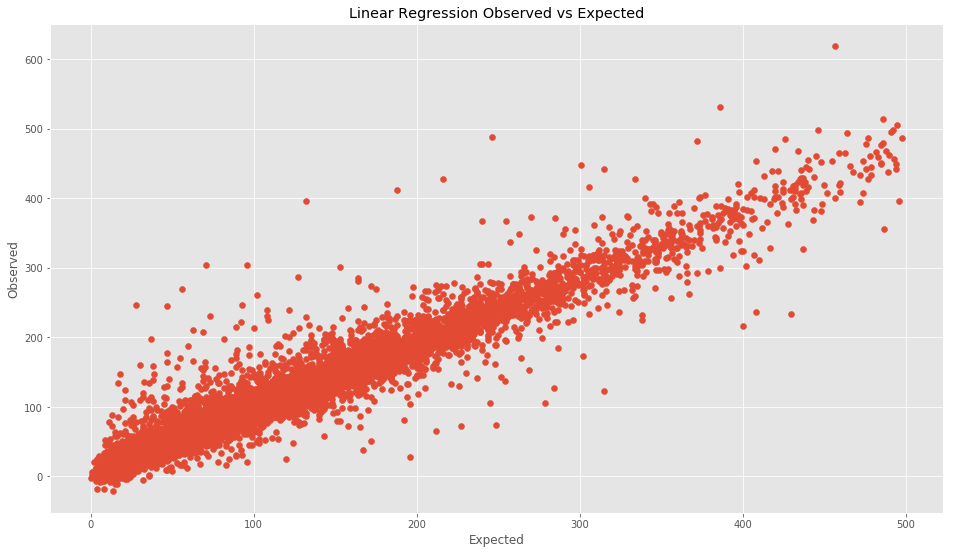

In [97]:
# Visualizing the observed vs predicted
plt.scatter(y_test, lin_pred)
plt.xlabel('Expected')
plt.ylabel('Observed')
plt.title('Linear Regression Observed vs Expected')
plt.show()

## DECISION FOREST

In [98]:
# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [99]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [100]:
# Scoring the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.9442163189985464

In [101]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [102]:
# Statistics
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 20.64
Mean absolute error: 12.06
R-squared: 0.94


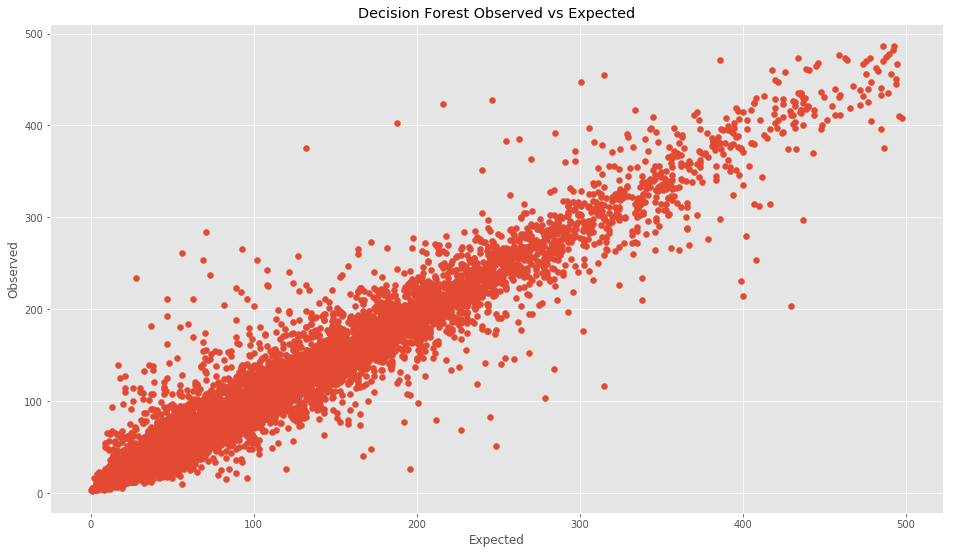

In [103]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Expected')
plt.ylabel('Observed')
plt.title('Decision Forest Observed vs Expected')
plt.show()

## LASSO REGRESSION

In [104]:
# Lasso Regression

lasso = Lasso()
lasso.fit(X_train, y_train)

# Scoring the model
lasso_score = lasso.score(X_test, y_test)
lasso_score


0.943381330281167

In [105]:
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)


print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

Root mean squared error: 20.80


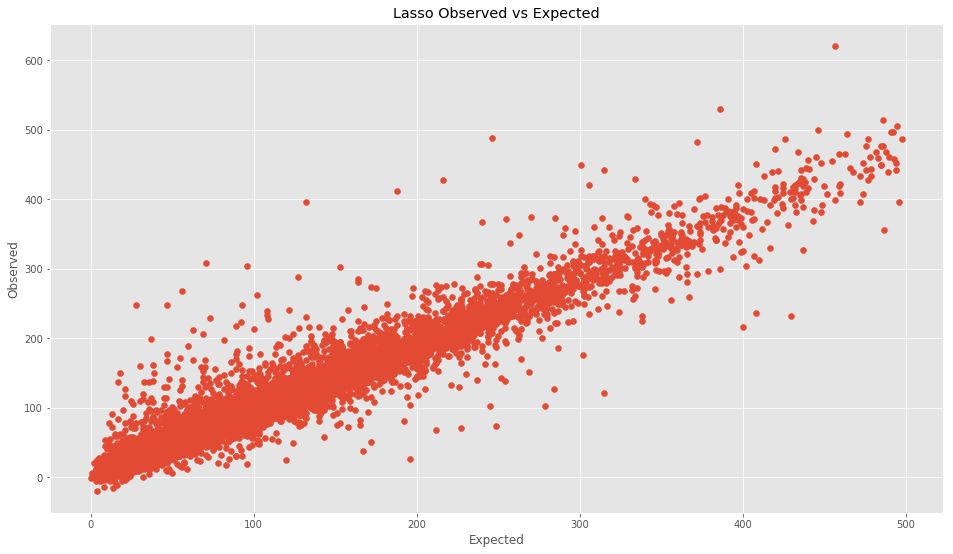

In [106]:
#Plotting the predictions
plt.scatter(y_test, lasso_pred)
plt.xlabel('Expected')
plt.ylabel('Observed')
plt.title('Lasso Observed vs Expected')
plt.show()

## ELASTICNET REGRESSION

In [107]:
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
#Scoring the model
elasticnet_score = elasticnet.score(X_test, y_test)
elasticnet_score

0.9433675148970504

In [109]:
#Prediction
elasticnet_pred = elasticnet.predict(X_test)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))

Root mean squared error: 20.80


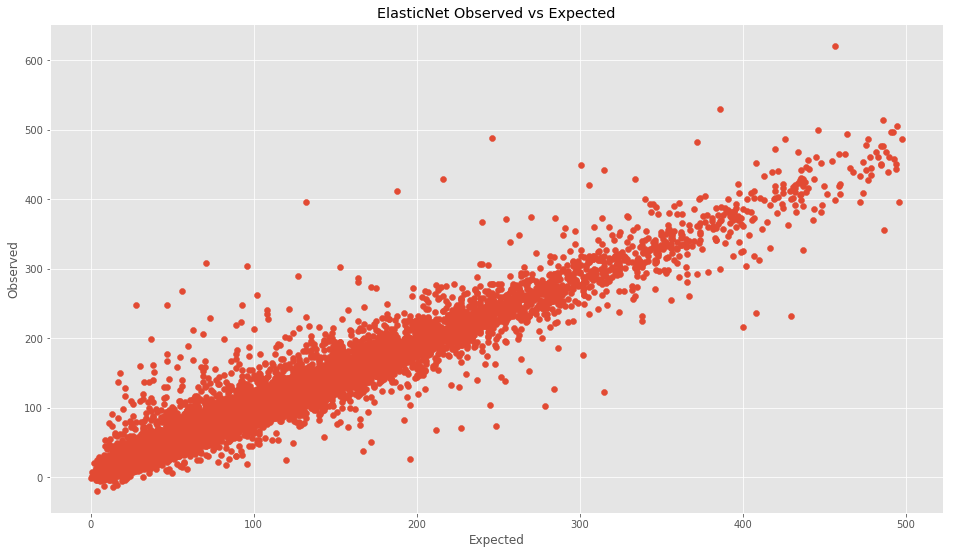

In [110]:
#Plotting the predictions
plt.scatter(y_test, elasticnet_pred)
plt.xlabel('Expected')
plt.ylabel('Observed')
plt.title('ElasticNet Observed vs Expected')
plt.show()

# RIDGE REGRESSION

In [112]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [113]:
Ridge_score = clf.score(X_test, y_test)
Ridge_score

0.943418463241306

In [114]:
#Prediction
Ridge_pred = clf.predict(X_test)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, Ridge_pred)))

Root mean squared error: 20.79


# NAIVE BAYES

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

In [116]:
gnb_score = gnb.score(X_test, y_test)
gnb_score

0.021525465031272846

In [117]:
#Prediction
y_pred = gnb.predict(X_test)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 76.97


# BAYESIAN RIDGE

In [118]:
clf = BayesianRidge(compute_score=True)
clf.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [119]:
clf_score = clf.score(X_test, y_test)
clf_score

0.9434232259118159

In [120]:
#Prediction
clf_pred = clf.predict(X_test)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, clf_pred)))

Root mean squared error: 20.79


# MLP REGRESSOR

In [121]:
# Create MLPRegressor object
mlp = MLPRegressor()

In [122]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [123]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

0.9455794745730408

In [124]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [125]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 20.39
Mean absolute error: 12.27
R-squared: 0.95


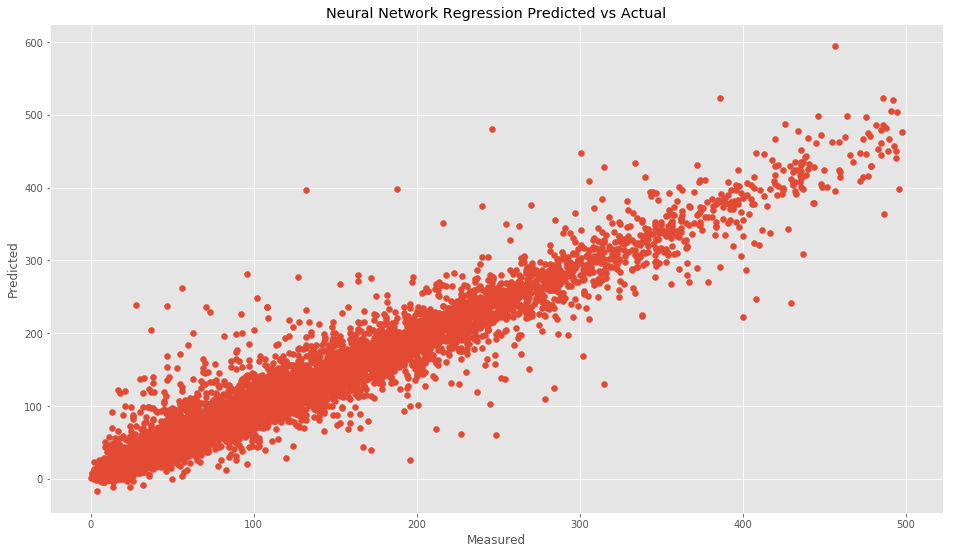

In [126]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

In [127]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [128]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [129]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.9467953808265207

In [130]:
extratree_pred = extra_tree.predict(X_test)

In [131]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

Root mean squared error: 20.16


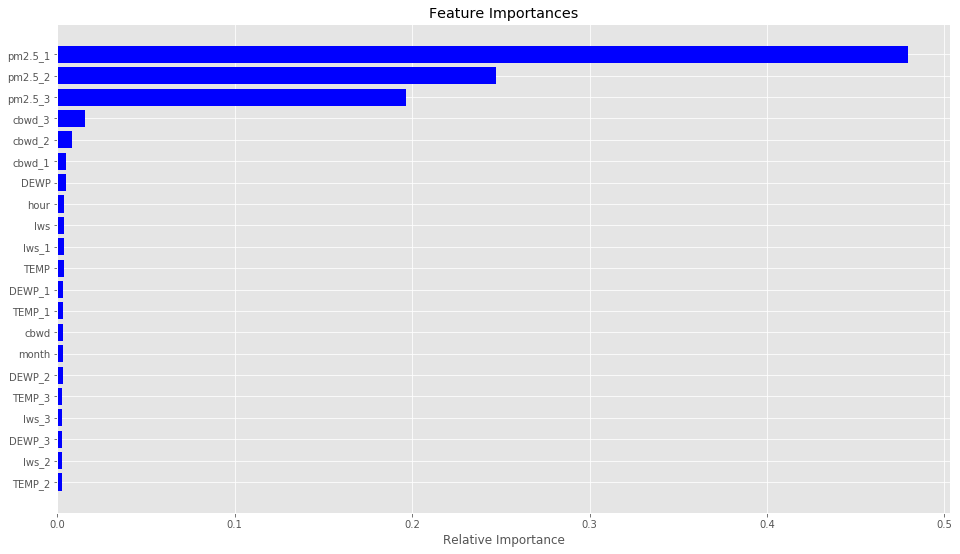

In [132]:
features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

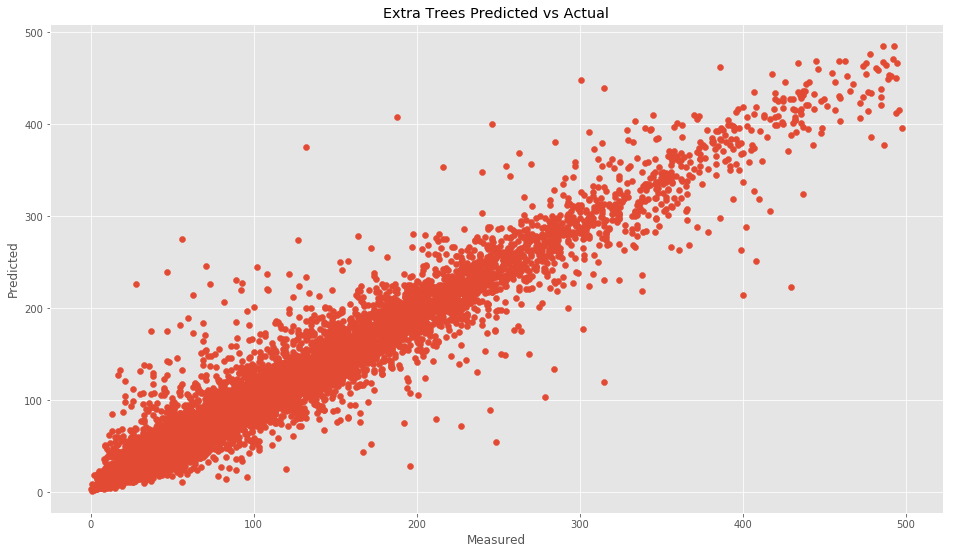

In [133]:
plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

# DECISION TREE AND ADA BOOST

In [ ]:
# Create Decision Tree Regressor object
tree_1 = DecisionTreeRegressor()

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1)

In [135]:
# Train the model using the training sets
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.1, loss='linear', n_estimators=200,
         random_state=None)

In [136]:
# Score the decision tree model
tree_1.score(X_test, y_test)

0.8850805868247794

In [137]:
# Score the boosted decision tree model
boosted_tree_score = tree_2.score(X_test, y_test)
boosted_tree_score

0.9425613651857501

In [138]:
# Make predictions using the testing set
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)

In [139]:
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))

Root mean squared error: 20.95
Mean absolute error: 11.97
R-squared: 0.94


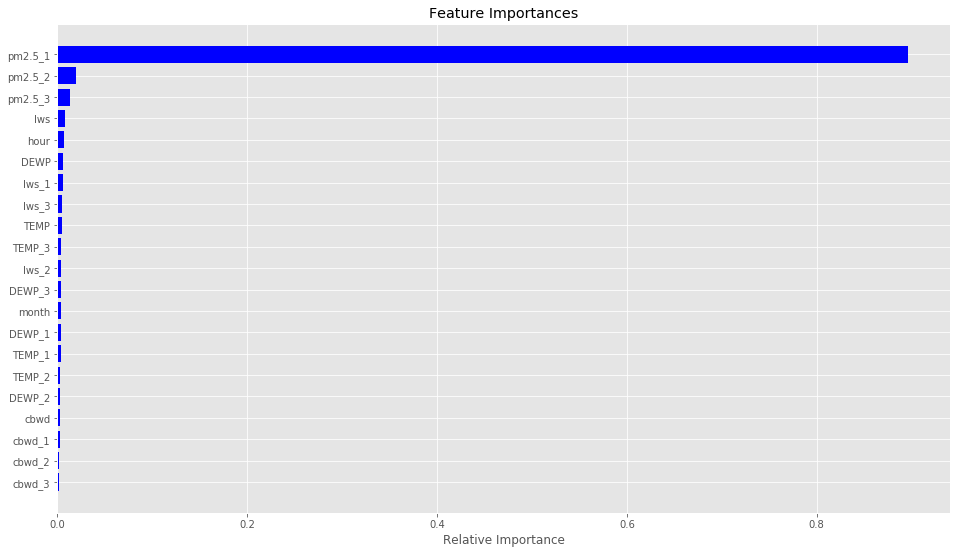

In [140]:
features = X.columns
importances = tree_2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

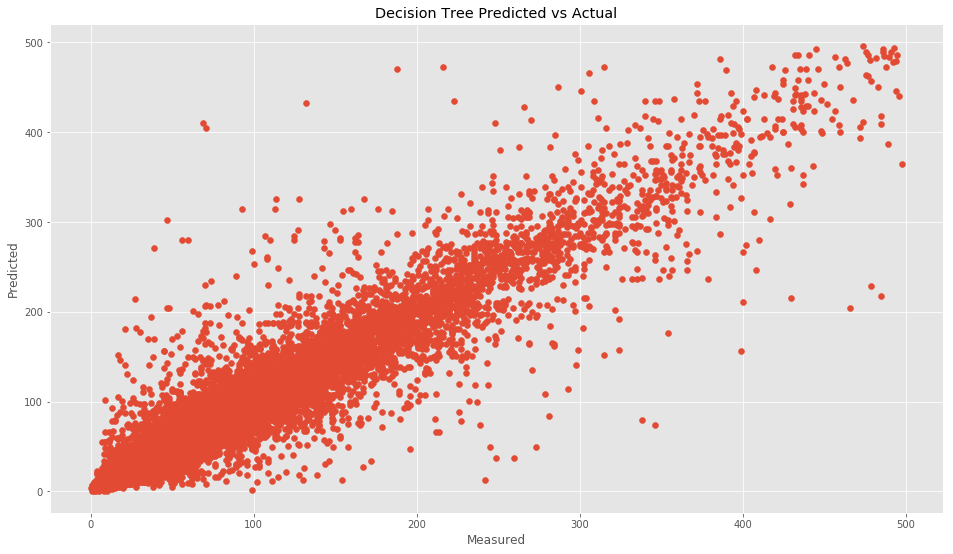

In [141]:
plt.scatter(y_test, tree_1_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree Predicted vs Actual')
plt.show()

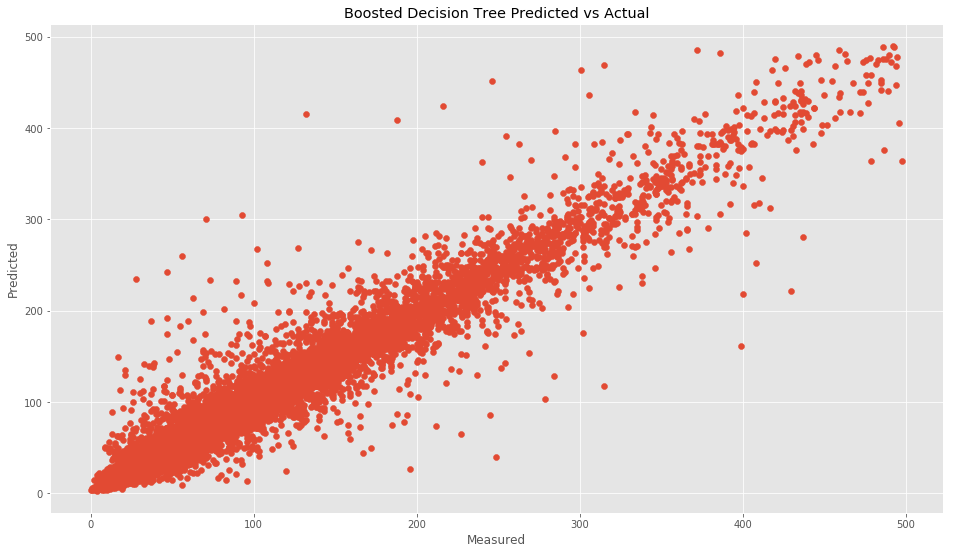

In [142]:
plt.scatter(y_test, tree_2_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Boosted Decision Tree Predicted vs Actual')
plt.show()

# EXTREME GRADIENT BOOST

In [143]:
# !pip install xgboost

In [144]:
#Fitting XGB regressor 
xboost = XGBRegressor(n_estimators=200)

In [145]:
xboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [146]:
xgb_score = xboost.score(X_test, y_test)
xgb_score

0.9476438624381426

In [147]:
#Predict 
xboost_pred = xboost.predict(X_test)

In [148]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Root mean squared error: 20.00


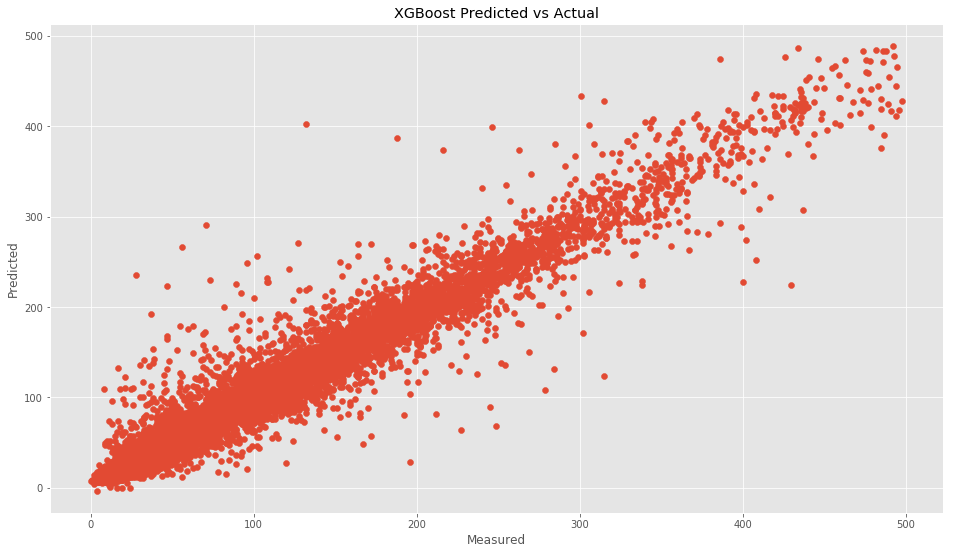

In [150]:
plt.scatter(y_test, xboost_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
plt.show()

In [151]:
print("COMPARISON SCORES - Feature shifting by 3 hours")
print("\n")
print("Linear regression score: ", linear_regression_score)
print("Lasso regression score: ", lasso_score)
print("ElasticNet regression score: ", elasticnet_score)
print("Decision forest score: ", decision_forest_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Extra Trees score: ", extratree_score)
print("Boosted decision tree score: ", boosted_tree_score)
print("XGBoost score:", xgb_score)
print("Ridge Regression score:", Ridge_score)
print("Naive Bayes score:", gnb_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Lasso RMSE: %.2f"
     % sqrt(mean_squared_error(y_test, lasso_pred)))
print("ElasticNet RMSE: %.2f"
     % sqrt(mean_squared_error(y_test, elasticnet_pred)))
print("Decision forest RMSE: %.2f"
     % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Extra Trees RMSE: %.2f"
     % sqrt(mean_squared_error(y_test, extratree_pred)))
print("Boosted decision tree RMSE: %.2f"
     % sqrt(mean_squared_error(y_test, tree_2_pred)))
print("XGBoost RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))
print("Ridge Regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, Ridge_pred)))
print("Naive Bayes RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, clf_pred)))

COMPARISON SCORES - Feature shifting by 3 hours


Linear regression score:  0.9434184588566525
Lasso regression score:  0.943381330281167
ElasticNet regression score:  0.9433675148970504
Decision forest score:  0.9442163189985464
Neural network regression score:  0.9455794745730408
Extra Trees score:  0.9467953808265207
Boosted decision tree score:  0.9425613651857501
XGBoost score: 0.9476438624381426
Ridge Regression score: 0.943418463241306
Naive Bayes score: 0.021525465031272846


RMSE:
Linear regression RMSE: 20.79
Lasso RMSE: 20.80
ElasticNet RMSE: 20.80
Decision forest RMSE: 20.64
Neural network RMSE: 20.39
Extra Trees RMSE: 20.16
Boosted decision tree RMSE: 20.95
XGBoost RMSE: 20.00
Ridge Regression RMSE: 20.79
Naive Bayes RMSE: 20.79


Of all the models used, XgBoost performed best with an RMSE score of 20.00

TRIED TO USE LSTM - BUT WAS NOT SUCCESSFUL - HAVE THIS FOR FUTURE WORK

In [154]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# #create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, 1)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)